# Measuring chance

<b>What's the probability of an event?</b>
<p>P(event) = # ways event can happen/total # of possible outcomes</p>
<p>Example: a coin flip</p>
<p>P(heads) = 1 way to get heads/2 possible outcomes = 1/2 = 50%</p>

## Calculating probabilities
<p>You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.</p>

In [166]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [167]:
#Dataset = amir_deals
dataset = pd.read_csv('dataset/amir_deals.csv', usecols =['product','client','status','amount','num_users'])

In [168]:
dataset.head()

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17


In [169]:
#Count the number of deals Amir worked on for each product type and store in counts.

counts = dataset['product'].value_counts()
counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [170]:
#Calculate the probability of selecting a deal for the different product types by dividing the counts 
#by the total number of deals Amir worked on.

probs = counts/dataset.shape[0]
probs

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64

<hr/>
<p><b>Assigning Sales People</b>
    
Let's look at a more complex scenario. There's a meeting coming up with a potential client, and we want to send someone from the sales team to the meeting. We'll put each person's name on a ticket in a box and pull one out randomly to decide who goes to the meeting.

Let <b>Amir, Brian, Claire and Damian</b> be the 4 sales people in a team with number of sales <b>[178, 128, 75, 69]</b> respectively.

</p>

In [171]:
sales_people = {
    'name': ['Amir', 'Brian', 'Claire', 'Damian'],
    'n_sales': [178, 128, 75, 69]
}

In [172]:
sales_count = pd.DataFrame(sales_people)

In [173]:
sales_count

,name,n_sales
0,Amir,178
1,Brian,128
2,Claire,75
3,Damian,69


<b>Brian's</b> name gets pulled out. The probability of Brian being selected is one out of four, or 25%.

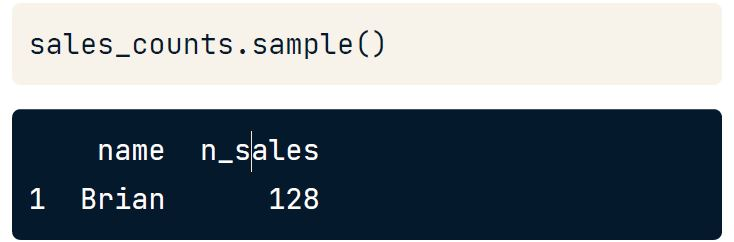

<p>We can recreate this scenario in Python using the <b>sample()</b> method. By default, it randomly samples one row from the DataFrame. However, if we run the same thing again, we may get a different row since the sample method chooses randomly. If we want to show the team how we picked Brian, this won't work well.</p>

<p>To ensure we get the same results when we run the script in front of the team, we'll set the random seed using <b>np.random.seed</b>. The seed is a number that Python's random number generator uses as a starting point, so if we orient it with a seed number, it will generate the same random value each time. The number itself doesn't matter. We could use 5, 139, or 3 million. The only thing that matters is that we use the same seed the next time we run the script. Now, we, or one of the sales-team members, can run this code over and over and get Brian every time.
    
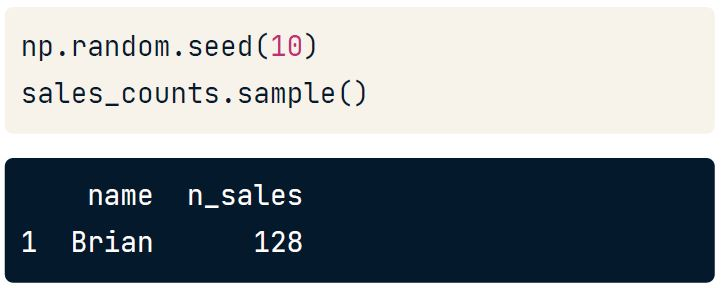

## Sampling deals
<p>In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.</p>

In [174]:
#Set random seed
np.random.seed(42)

In [175]:
# Sample 5 deals without replacement
samples_without_replacement = dataset.sample(5)
samples_without_replacement

,product,client,status,amount,num_users
19,Product I,Current,Won,3220.45,45
45,Product B,Current,Won,8614.12,17
140,Product B,Current,Lost,5856.18,45
30,Product C,New,Won,6151.14,66
67,Product B,Current,Won,4571.26,19


In [176]:
# Sample 5 deals with replacement
samples_with_replacement = dataset.sample(5, replace = True)
samples_with_replacement

,product,client,status,amount,num_users
120,Product D,Current,Lost,8180.81,96
115,Product F,Current,Lost,1664.40,58
2,Product B,New,Won,5738.09,87
102,Product D,New,Lost,1196.53,63
154,Product B,Current,Lost,6979.77,8


<p><b>It's important to consider how you'll take a sample since there's no one-size-fits-all way to sample, and this can have an effect on your results.</b></p>

## Discrete Distributions

In [177]:
die = [1,2,3,4,5,6]

In [178]:
#Even Die
roll_die = pd.DataFrame(die, columns=['Die'])

In [179]:
#Probability of each possible outcome
roll_die['prob'] = 1 / roll_die.shape[0]

In [180]:
roll_die

,Die,prob
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667


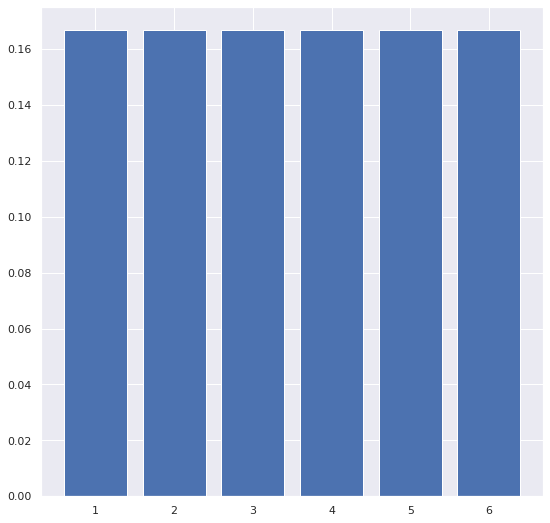

In [181]:
#Visualizing a probability distribution (PMF)
plt.bar(x=roll_die['Die'], height=roll_die['prob'])
plt.show()

In [182]:
#Expected value: mean (theoretical mean) of a probability distribution
np.mean(roll_die['Die'])

3.5

In [183]:
#Sampling from discrete distributions
roll_10 = roll_die.sample(10, replace = True)
# roll_10

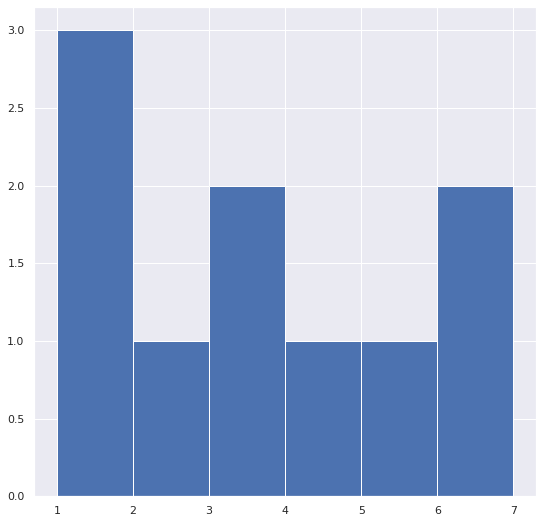

In [184]:
#Visualizing a sample
roll_10['Die'].hist(bins=np.linspace(1,7,7))
plt.show()

In [185]:
#Mean of sample 10 rolls
mean_roll_10 = np.mean(roll_10['Die'])
mean_roll_10

3.2

<p><b>Sampled Meand = 3.3 which is close to the expected value (Theoretical probability distribution) i.e. 3.5</b></p>

<p>If we roll the die 100 times, the distribution of the rolls looks a bit more even, and the mean is closer to 3.5.</p>
<p>If we roll 1000 times, it looks even more like the theoretical probability distribution and the mean closely matches 3.5.</p>
<p>This is called the <b>law of large numbers</b>, which is the idea that as the size of your sample increases, the sample mean will approach the theoretical mean.</p>

## The Uniform Distribution

<p>The uniform distribution is a probability distribution where each value within a certain range is equally likely to occur and values outside of the range never occur. If we make a density plot of a uniform distribution, it appears flat because no value is any more likely (and hence has any more density) than another.

Many useful functions for working with probability distributions in Python are contained in the scipy.stats library. Let's load in some libraries, generate some uniform data and plot a density curve:</p>

In [186]:
from scipy.stats import uniform

In [187]:
uniform_data = uniform.rvs(size=100000,  # Generate 100000 numbers
                                 loc = 0,      # From 0 
                                 scale=10)     # To 10

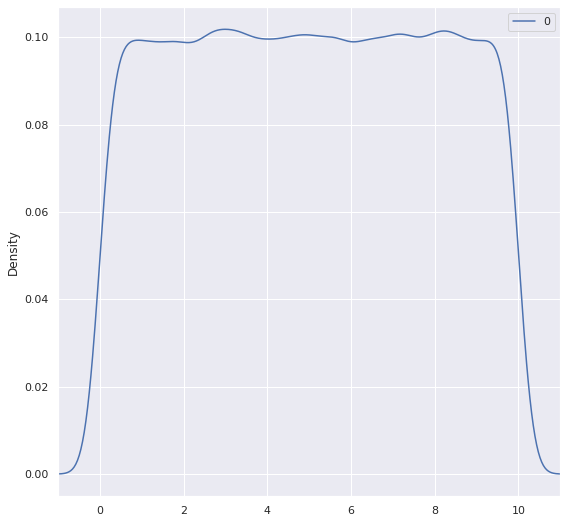

In [188]:
pd.DataFrame(uniform_data).plot(kind="density",  # Plot the distribution
                               figsize=(9,9),
                               xlim=(-1,11));

<p><b>Note:</b>the plot above is an approximation of the underlying distribution, since it is based on a sample of observations.
<p>the code above, we generated 100,000 data points from a uniform distribution spanning the range 0 to 10. In the density plot, we see that the density of our uniform data is essentially level meaning any given value has the same probability of occurring. The area under a probability density curve is always equal to 1.</p>
<p>Probability distributions in scipy come with several useful functions for generating random data and extracting values of interest:</p>
<ul>
    <li>stats.distribution.rvs() generates random numbers from the specified distribution. The arguments to rvs() will vary depending on the type of distribution you're working with; in the case of the uniform distribution, we have to specify the starting and ending points and the size (number of random points to generate.)</li>
    <li>stats.distribution.cdf() is used to determine the probability that an observation drawn from a distribution falls below a specified value (known as the cumulative distribution function). In essence, cdf() gives you the area under the distribution's density curve to the left of a certain value on the x axis. For example, in the uniform distribution above, there is a 25% chance that an observation will be in the range 0 to 2.5 and a 75% chance it will fall in the range 2.5 to 10. We can confirm this with cdf():</li>
</ul>

In [189]:
uniform.cdf(x=2.5,         # Cutoff value (quantile) to check
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end20)

0.25

<p>-stats.distribution.ppf() is the inverse of cdf(): it returns the x axis cutoff value (quantile) associated with a given probability. For instance, if we want to know the cutoff value for which we have a 40% chance of drawing an observation below that value, we can use ppf():</p>

In [190]:
uniform.ppf(q=0.4,         # Probability cutoff
                  loc=0,         # Distribution start
                  scale=10)      # Distribution end

4.0

<p>-stats.distribution.pdf() gives you the probability density (height of the distribution) at a given x value. Since the uniform distribution is flat, all x values within its range will have the same probability density and x values outside the range have a probability density of 0:</p>

In [191]:
for x in range(-1,12,3):
    print("Density at x value " + str(x))
    print(uniform.pdf(x, loc=0, scale=10) )   

Density at x value -1
0.0
Density at x value 2
0.1
Density at x value 5
0.1
Density at x value 8
0.1
Density at x value 11
0.0


<p><b>Probability distribution functions in scipy also support median(), mean(), var() and std().</b></p>

##### Generating Random Numbers and Setting The Seed
<p>When you need to generate random real numbers in a range with equal probability you can draw numbers from a uniform distribution using stats.distribution.rvs(). Python also comes with a library called "random" that lets you perform various operations that involve randomization. Let's look at a few functions in the random library:</p>

In [192]:
import random

random.randint(0,10)     # Get a random integer in the specified range

0

In [193]:
random.choice([2,4,6,9]) # Get a random element from a sequence

6

In [194]:
random.random()          # Get a real number between 0 and 1

0.48253881390428643

In [195]:
random.uniform(0,10)     # Get a real in the specified range

6.434087515648309

<p>Notice that the random library also lets you generate random uniform numbers. Regardless of the method you use to generate random numbers, however, the result of a random process can differ from one run to the next. Having results vary each time you run a function is often not desirable. For example, if you want a colleague to be able to reproduce your results exactly, you can run into problems when you use randomization. You can ensure that your results are the same each time you use a function that involves randomness by setting the random number generator's seed value to initialize it prior to running the function. Set the random seed with random.seed():</p>

In [196]:
random.seed(12)  # Set the seed to an arbitrary value

print([random.uniform(0,10) for x in range(4)])

random.seed(12)  # Set the seed to the same value

print([random.uniform(0,10) for x in range(4)])

[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]
[4.7457067868854805, 6.574725026572553, 6.664104711248381, 1.4260035292536777]


<p>Notice that we generated the exact same numbers with both calls to random.uniform() because we set the same seed before each call. If we had not set the seed, we would have gotten different numbers. This reproducibility illustrates the fact that these random numbers aren't truly random, but rather "pseudorandom".</p>
<p>Many functions in Python's libraries that use randomness have an optional random seed argument built in so that you don't have to set the seed outside of the function. For instance, the rvs() function has an optional argument random_state, that lets you set the seed.</p>
<p><b>Note:</b>The Python standard library "random" has a separate internal seed from the numpy library. When using functions from numpy and libraries built on top of numpy (pandas, scipy, scikit-learn) use np.random.seed() to set the seed.</p>

# Other continuous distributions

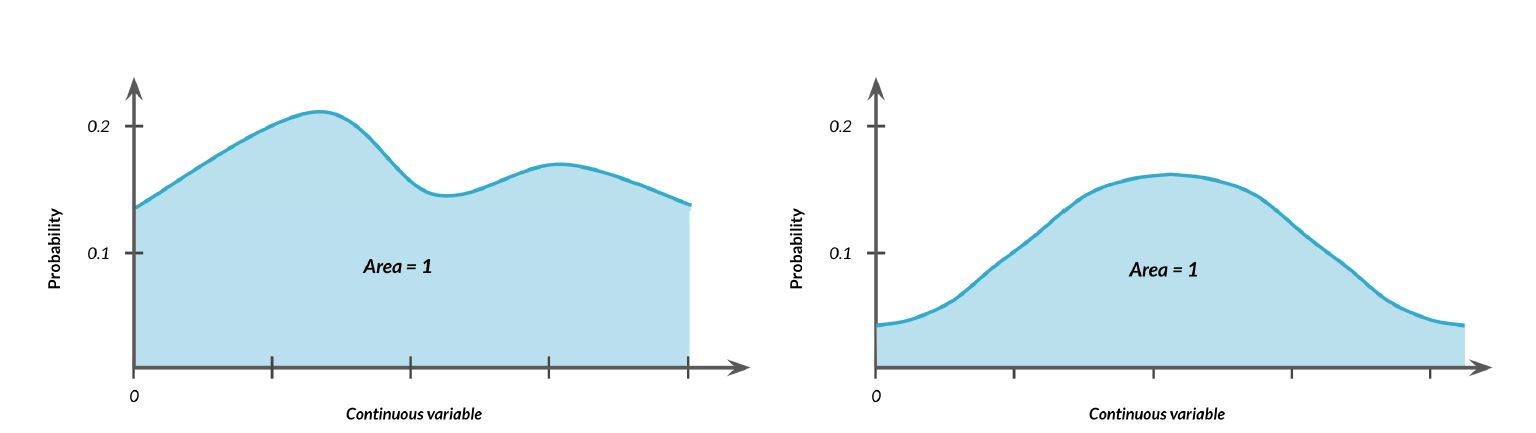

# Other special types of distributions

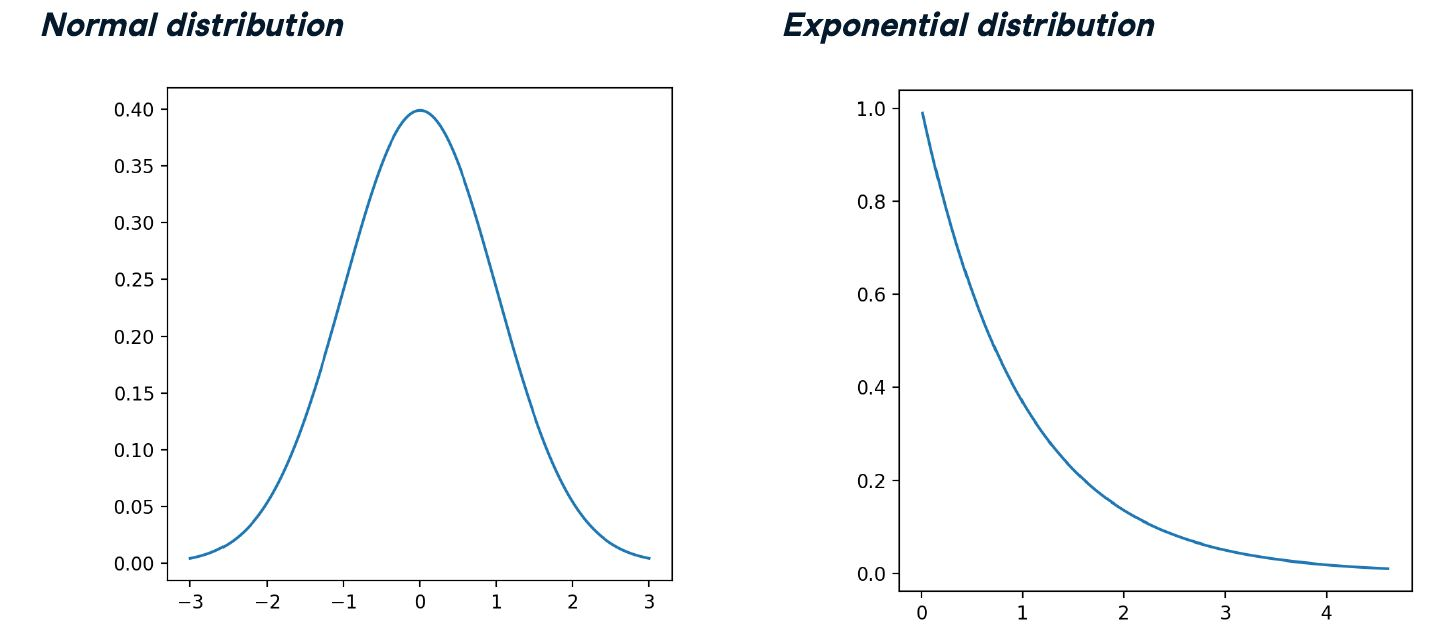

# The Binomial Distribution
<p>The binomial distribution is a discrete probability distribution that models the outcomes of a given number of random trails of some experiment or event. The binomial is defined by two parameters: the probability of success in any given trial and the number of trials. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. For example, we could model flipping a fair coin 10 times with a binomial distribution where the number of trials is set to 10 and the probability of success is set to 0.5. In this case the distribution would tell us how likely it is to get zero heads, 1 head, 2 heads and so on.</p>

<p>Let's generate and investigate some binomial data:</p>

In [197]:
from scipy.stats import binom

col_0   0    1    2     3     4     5     6     7    8   9   10
row_0                                                          
counts   7  106  429  1211  1970  2512  2035  1162  460  98  10


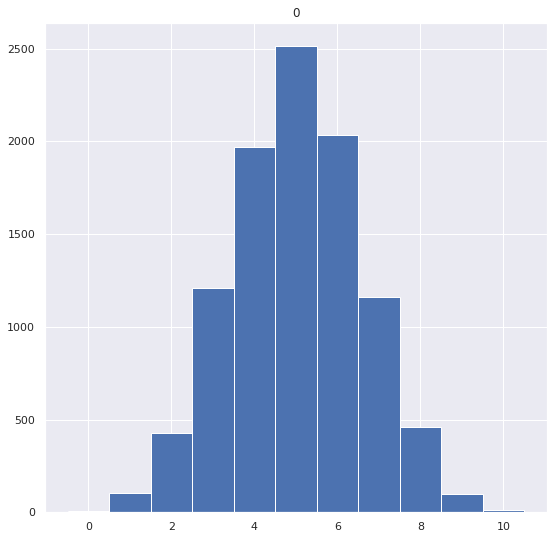

In [198]:
fair_coin_flips = binom.rvs(n=10,        # Number of flips per trial
                            p=0.5,       # Success probability
                            size=10000)  # Number of trials

print(pd.crosstab(index="counts", columns= fair_coin_flips))

pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins=11);

<p>Note that since the binomial distribution is discrete, it only takes on integer values so we can summarize binomial data with a frequency table and its distribution with a histogram. The histogram shows us that a binomial distribution with a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. This is reminiscent of the normal distribution, but if we alter the success probability, the distribution won't be symmetric:</p>

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts   3  47  263  875  2017  3070  2630  1095


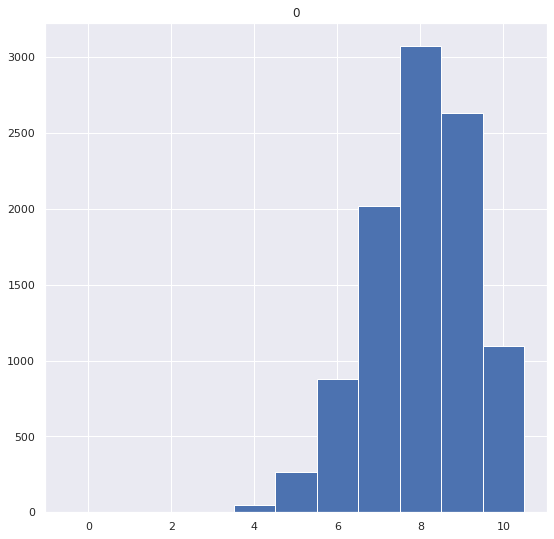

In [199]:
biased_coin_flips = binom.rvs(n=10,      # Number of flips per trial
                            p=0.8,       # Success probability
                            size=10000)  # Number of trials

# Print table of counts
print(pd.crosstab(index="counts", columns= biased_coin_flips))

# Plot histogram
pd.DataFrame(biased_coin_flips).hist(range=(-0.5,10.5), bins=11);

<p>The <b>cdf()</b> function lets us check the probability of achieving a number of successes within a certain range:</p>

In [200]:
prob_5 = binom.cdf(k=5,      # Probability of k = 5 successes or less
        n=10,       # With 10 flips
        p=0.8)      # And success probability 0.8
print('The probability of 5 or less success is {}'.format(prob_5))

The probability of 5 or less success is 0.032793497599999964


In [201]:
prob_9 = 1 - binom.cdf(k=9,       # Probability of k = 9 successes or more
            n=10,       # With 10 flips
            p=0.8)      # And success probability 0.8
print('The probability of 9 or more success is {}'.format(prob_9))

The probability of 9 or more success is 0.10737418240000007


<p>For continuous probability density functions, you use pdf() to check the probability density at a given x value. For discrete distributions like the binomial, use stats.distribution.pmf() (probability mass function) to check the mass (proportion of observations) at given number of successes k:</p>

In [202]:
pmf_5 = binom.pmf(k=5,        # Probability of k = 5 successes
                n=10,       # With 10 flips
                p=0.5)      # And success probability 0.5
print('The PMF for 5 success with 50% probability is {}'.format(pmf_5))

The PMF for 5 success with 50% probability is 0.24609375000000025


In [203]:
pmf_8 = binom.pmf(k=8,        # Probability of k = 8 successes
                n=10,       # With 10 flips
                p=0.8)      # And success probability 0.8
print('The PMF for 8 success with 80% probability is {}'.format(pmf_8))

The PMF for 8 success with 80% probability is 0.301989888


# The Normal Distribution
<p>The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center (mean) and spread (standard deviation.). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution: as a rule of thumb, about 68% of the data lies within 1 standard deviation of the mean, 95% lies within 2 standard deviations and 99.7% lies within 3 standard deviations.

The normal distribution is perhaps the most important distribution in all of statistics. It turns out that many real world phenomena, like IQ test scores and human heights, roughly follow a normal distribution, so it is often used to model random variables. Many common statistical tests assume distributions are normal.

The scipy nickname for the normal distribution is norm. Let's investigate the normal distribution:</p>

In [204]:
from scipy.stats import norm

In [205]:
prob_under_minus1 = norm.cdf(x= -1,  
                                loc = 0,               
                                scale= 1)     

prob_over_1 = 1 - norm.cdf(x= 1,  
                            loc = 0,               
                            scale= 1) 

between_prob = 1-(prob_under_minus1+prob_over_1)

print(prob_under_minus1, prob_over_1, between_prob)

0.15865525393145707 0.15865525393145707 0.6826894921370859


<p>The output shows that roughly 16% of the data generated by a normal distribution with mean 0 and standard deviation 1 is below -1, 16% is above 1 and 68% lies between -1 and 1, which agrees with the 68, 95, 99.7 rule. Let's plot the normal distribution and inspect areas we calculated:</p>

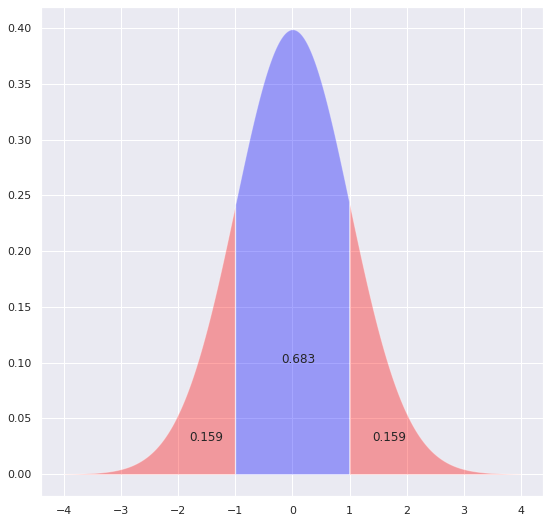

In [206]:
# Plot normal distribution areas*

plt.rcParams["figure.figsize"] = (9,9)
                                  
plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.text(x=-1.8, y=0.03, s= round(prob_under_minus1,3))
plt.text(x=-0.2, y=0.1, s= round(between_prob,3))
plt.text(x=1.4, y=0.03, s= round(prob_over_1,3));

<p>The plot above shows the bell shape of the normal distribution, the area below and above one standard deviation and the area within 1 standard deviation of the mean. Finding quantiles of the normal distribution is a common task when performing statistical tests. You can check normal distribution quantiles with stats.norm.ppf():</p>

In [207]:
print(norm.ppf(q=0.025) ) # Find the quantile for the 2.5% cutoff

print(norm.ppf(q=0.975) ) # Find the quantile for the 97.5% cutoff

-1.9599639845400545
1.959963984540054


<p>The quantile output above confirms that roughly 95% of the data is within 2 standard deviations from the mean.</p>
<p><b>Note:</b> a mean of 0 and standard deviation of 1 are default values for the normal distribution.</p>

In [208]:
print(norm.cdf(x = -3)) #Find how much data is below -3
print(norm.cdf(x = 3)) #Find how much data is above 3

0.0013498980316300933
0.9986501019683699


# The Geometric and Exponential Distributions

<p>The geometric and exponential distributions model the time it takes for an event to occur. The geometric distribution is discrete and models the number of trials it takes to achieve a success in repeated experiments with a given probability of success. The exponential distribution is a continuous analog of the geometric distribution and models the amount of time you have to wait before an event occurs given a certain occurrence rate.

The scipy nickname for the geometric distribution is "geom". Let's use the geom functions to model the number of trials it takes to get a success (heads) when flipping a fair coin:</p>

In [209]:
from scipy.stats import geom


col_0     1     2     3    4    5    6   7   8   9   10  11  12  13  14
row_0                                                                  
counts  5066  2458  1207  625  332  126  87  44  25  17   8   2   2   1


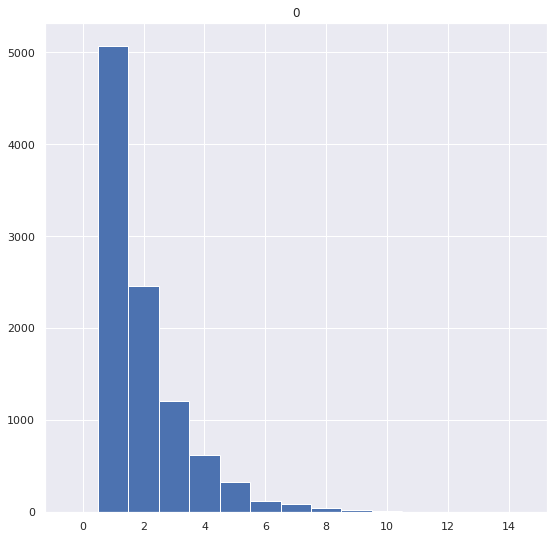

In [210]:
random.seed(12)

flips_till_heads = geom.rvs(size=10000,  # Generate geometric data
                                  p=0.5)       # With success prob 0.5

# Print table of counts
print( pd.crosstab(index="counts", columns= flips_till_heads))

# Plot histogram
pd.DataFrame(flips_till_heads).hist(range=(-0.5,max(flips_till_heads)+0.5)
                                    , bins=max(flips_till_heads)+1);

<p>The distribution looks similar to what we'd expect: it is very likely to get a heads in 1 or 2 flips, while it is very unlikely for it to take more than 5 flips to get a heads. In the 10,000 trails we generated, the longest it took to get a heads was 13 flips.</p>
<p>Let's use cdf() to check the probability of needing 5 flips or more to get a success:</p>

In [211]:
first_five = geom.cdf(k=5,   # Prob of success in first 5 flips
                           p=0.5)

1 - first_five

0.03125

<p>Use pmf() to check the probability of seeing a specific number of flips before a successes:</p>

In [212]:
geom.pmf(k=2,   # Prob of needing exactly 2 flips to get first success
              p=0.5)

0.25

<p>The scipy name for the <b>exponential distribution</b> is "expon". Let's investigate the exponential distribution:</p>

In [213]:
from scipy.stats import expon

In [214]:
# Get the probability of waiting more than 1 time unit before a success

prob_1 = expon.cdf(x=1,        
                    scale=1)  # Arrival rate

1 - prob_1

0.36787944117144233

<p><b>Note:</b> The average arrival time for the exponential distribution is equal to 1/arrival_rate.</p>
<p>Let's plot this exponential distribution to get an idea of its shape:</p>

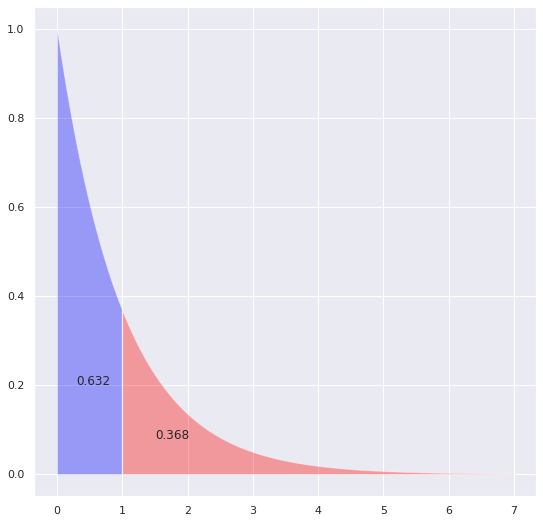

In [215]:
plt.fill_between(x=np.arange(0,1,0.01), 
                 y1= expon.pdf(np.arange(0,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,7,0.01), 
                 y1= expon.pdf(np.arange(1,7,0.01)) ,
                 facecolor='red',
                 alpha=0.35)


plt.text(x=0.3, y=0.2, s= round(prob_1,3))
plt.text(x=1.5, y=0.08, s= round(1 - prob_1,3));

<p>Similar to the geometric distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases where you have to wait much longer than average for an arrival.</p>

# The Poisson Distribution
<p>The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as the number of arrivals a hospital can expect in a hour's time or the number of emails you'd expect to receive in a week.</p>
<p>The scipy name for the Poisson distribution is "poisson". Let's generate and plot some data from a Poisson distribution with an arrival rate of 1 per time unit:</p>

In [216]:
from scipy.stats import poisson

col_0      0     1     2    3    4   5  6  7
row_0                                       
counts  3719  3721  1775  598  155  25  5  2


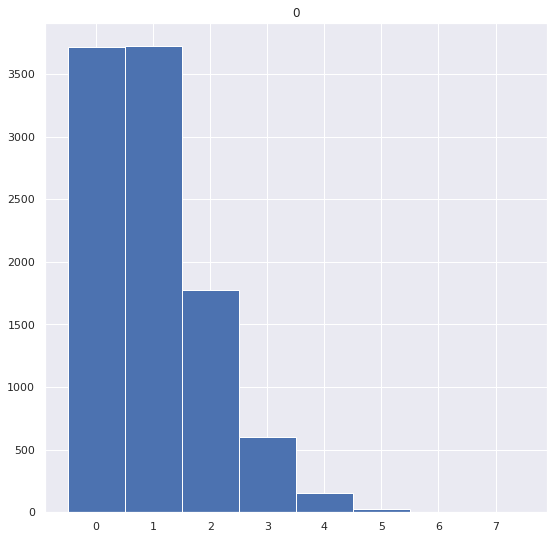

In [217]:
random.seed(12)

arrival_rate_1 = poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=1 )       # Average arrival time 1

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_1))

# Plot histogram
pd.DataFrame(arrival_rate_1).hist(range=(-0.5,max(arrival_rate_1)+0.5)
                                    , bins=max(arrival_rate_1)+1);

<p>The histogram shows that when arrivals are relatively infrequent, it is rare to see more than a couple of arrivals in each time period. When the arrival rate is high, it becomes increasingly rare to see a low number of arrivals and the distribution starts to look more symmetric:</p>

col_0   1   2   3    4    5    6    7     8     9     10  ...   14   15   16  \
row_0                                                     ...                  
counts   4  24  73  160  403  606  870  1102  1212  1275  ...  502  354  229   

col_0    17  18  19  20  21  22  24  
row_0                                
counts  132  73  33  23   9   5   1  

[1 rows x 23 columns]


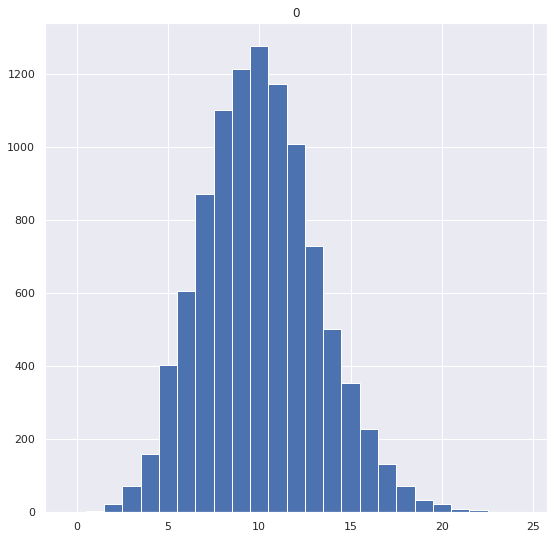

In [218]:
random.seed(12)

arrival_rate_10 = poisson.rvs(size=10000,  # Generate Poisson data
                                   mu=10)       # Average arrival time 10

# Print table of counts
print( pd.crosstab(index="counts", columns= arrival_rate_10))

# Plot histogram
pd.DataFrame(arrival_rate_10).hist(range=(-0.5,max(arrival_rate_10)+0.5)
                                    , bins=max(arrival_rate_10)+1);

<p>As with other discrete probability distributions, we can use cdf() to check the probability of achieving more or less than a certain number of successes and pmf() to check the probability of obtaining a specific number of successes:</p>

In [219]:
poisson.cdf(k=5,     # Check the probability of 5 arrivals or less
            mu=10)   # With arrival rate 10

0.06708596287903189

In [220]:
poisson.pmf(k=10,     # Check the prob for exactly 10 arrivals
            mu=10)    # With arrival rate 10

0.12511003572113372